In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
def load_data():
    X_train = pd.read_csv('HADDataset/train/X_train.txt', delim_whitespace=True, header=None)
    y_train = pd.read_csv('HADDataset/train/y_train.txt', delim_whitespace=True, header=None)
    X_test = pd.read_csv('HADDataset/test/X_test.txt', delim_whitespace=True, header=None)
    y_test = pd.read_csv('HADDataset/test/y_test.txt', delim_whitespace=True, header=None)

    return (X_train, y_train), (X_test, y_test)

In [3]:
# Preprocess the data
def preprocess_data(X, y):
    X = (X - X.mean()) / X.std()  # Normalize the data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y.values.ravel())  # Encode labels
    y_categorical = to_categorical(y_encoded)  # One-hot encode labels
    return X, y_categorical

# Reshape the data for LSTM input
def reshape_data(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X.iloc[i:i + timesteps].values)
        ys.append(y[i + timesteps])
    return np.array(Xs), np.array(ys)

In [4]:
from tensorflow.keras import layers, models

# Define the LSTM model
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [5]:
import matplotlib.pyplot as plt

# Plot accuracy during training
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


/var/folders/jl/rlqck5v5593fvglklwwnxc1w0000gn/T/ipykernel_53627/3018852003.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('HADDataset/train/X_train.txt', delim_whitespace=True, header=None)
/var/folders/jl/rlqck5v5593fvglklwwnxc1w0000gn/T/ipykernel_53627/3018852003.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('HADDataset/train/y_train.txt', delim_whitespace=True, header=None)
/var/folders/jl/rlqck5v5593fvglklwwnxc1w0000gn/T/ipykernel_53627/3018852003.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('HADDataset/test/X_test.txt', delim_whitespace=True, header=None)
/var/folders/jl/rlqck5v5593fvglklwwnxc1w0000gn/T/ipyker

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 353ms/step - accuracy: 0.7631 - loss: 0.7261 - val_accuracy: 0.9351 - val_loss: 0.2064
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 292ms/step - accuracy: 0.9481 - loss: 0.1598 - val_accuracy: 0.9415 - val_loss: 0.1745
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 300ms/step - accuracy: 0.9551 - loss: 0.1353 - val_accuracy: 0.9358 - val_loss: 0.1810
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 304ms/step - accuracy: 0.9634 - loss: 0.1125 - val_accuracy: 0.9440 - val_loss: 0.1759
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 36s 322ms/step - accuracy: 0.9625 - loss: 0.1201 - val_accuracy: 0.9177 - val_loss: 0.1979
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 304ms/step - accuracy: 0.9570 - loss: 0.1151 - val_accuracy: 0.9475 - val_loss: 0.1685
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step - accuracy: 0.9675 - loss: 0.0959 - val_accuracy: 0.9230 - val_loss: 0.2226
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 292ms/step - accuracy: 0.9658 - loss: 0

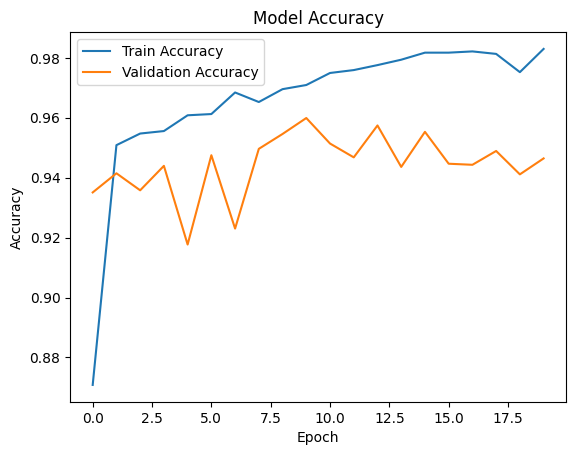

In [7]:

def main():
    # Load and preprocess data
    (X_train, y_train), (X_test, y_test) = load_data()
    X_train, y_train = preprocess_data(X_train, y_train)
    X_test, y_test = preprocess_data(X_test, y_test)

    # Define parameters
    timesteps = 128  # Define the sequence length (number of time steps)
    num_classes = y_train.shape[1]  # Number of output classes

    # Reshape data for LSTM
    X_train_lstm, y_train_lstm = reshape_data(X_train, y_train, timesteps)
    X_test_lstm, y_test_lstm = reshape_data(X_test, y_test, timesteps)

    # Create the LSTM model
    model = create_model((timesteps, X_train.shape[1]), num_classes)

    # Train the model
    history = model.fit(X_train_lstm, y_train_lstm, validation_data=(X_test_lstm, y_test_lstm), epochs=20, batch_size=64)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
    print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

    # Plot accuracy
    plot_accuracy(history)

if __name__ == "__main__":
    main()
